# Business Understanding

> We are using AirBNB Seattle area data to discover if there are any business insight. We have the availability and price of listings within 2016, the features of those listings and the reviews for those listings. I will analyze if there are any factors will affect price and availavility.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gather

In [2]:
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

# Data Understanding

- When is the busiest period of the year? How is the price fluctuate within the year?
- Which date in the week is the busiest and whether the price is higher?
- Does zipcode affect the price of house and availability?
- Which factors in the listing will affect the price?
- Which factors in the listing will affect availability?

## Data Access

> The below cells are used to understand the content of three dataframe and check the missing value and type of value. This step will help me to have a blueprint about how to clean the data.

In [3]:
calendar.head(3)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN


In [4]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [5]:
# Check if there are any columns can be removed because all values are the same
calendar.nunique()

listing_id    3818
date           365
available        2
price          669
dtype: int64

In [6]:
# Using the below code to check missing_value in price is because of unavailable
# 1393570 = total rows ; 934542 == non_null price

sum(calendar.query('available == "f"').index == calendar[calendar['price'].isnull()].index) == (1393570-934542 )

True

In [7]:
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [8]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [9]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


#### These data are from Seattle area, so I want to check if all the listing share same features. If yes, I can remove those columns if they are all the same between different listing.

In [10]:
one_value = np.array(listings.nunique().sort_values()[:11].index)
shared_features = listings[one_value].iloc[0,]
shared_features

license                             NaN
country_code                         US
market                          Seattle
jurisdiction_names           WASHINGTON
country                   United States
has_availability                      t
experiences_offered                none
requires_license                      f
last_scraped                 2016-01-04
scrape_id                20160104002432
calendar_last_scraped        2016-01-04
Name: 0, dtype: object

In [11]:
listings[one_value].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   license                0 non-null      float64
 1   country_code           3818 non-null   object 
 2   market                 3818 non-null   object 
 3   jurisdiction_names     3818 non-null   object 
 4   country                3818 non-null   object 
 5   has_availability       3818 non-null   object 
 6   experiences_offered    3818 non-null   object 
 7   requires_license       3818 non-null   object 
 8   last_scraped           3818 non-null   object 
 9   scrape_id              3818 non-null   int64  
 10  calendar_last_scraped  3818 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 328.2+ KB


In [12]:
listings.groupby('zipcode').size()

zipcode
98101        201
98102        339
98103        394
98104         95
98105        225
98106         58
98107        180
98108         56
98109        202
98112        167
98115        178
98116        112
98117        164
98118        154
98119        143
98121        196
98122        420
98125         71
98126         63
98133         46
98134          5
98136         44
98144        200
98146          5
98177         19
98178          7
98199         66
99\n98122      1
dtype: int64

In [13]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [14]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [15]:
reviews.nunique()

listing_id        3191
id               84849
date              1930
reviewer_id      75730
reviewer_name    14380
comments         84136
dtype: int64

In [16]:
count = reviews.groupby('listing_id').nunique().sort_values('comments', ascending = False)
count.query('comments > 10')

,listing_id,id,date,reviewer_id,reviewer_name,comments
listing_id,,,,,,
208356,1,474,471,463,375,474
365550,1,466,462,457,356,464
25002,1,404,401,394,307,404
47196,1,353,353,344,284,353
63308,1,320,320,299,246,320
...,...,...,...,...,...,...
8847108,1,11,11,11,11,11
1840671,1,11,11,11,11,11
5319948,1,11,11,11,11,11


- There are 1769 house with more than 10 comments.

## Data Clean

- change the type of date column to datetime 
- create a column indicate the day of the week
- transfer price to float allowing me to manipulate the data easier
- delete [one_value] columns as all these columns have same value in the dataframe
- state WA == wa so drop
- fix zipcode typo "99\\n98122"
- Remove url columns

In [17]:
calendar['date'] = pd.to_datetime(calendar['date'])

In [18]:
# create a column indicate the weekday
calendar['weekday'] = calendar['date'].dt.weekday

In [19]:
# transfer price to float
calendar['price'] = calendar['price'].str[1:].str.replace(',','').astype('float')
calendar.head(2)

,listing_id,date,available,price,weekday
0,241032,2016-01-04,t,85.0,0
1,241032,2016-01-05,t,85.0,1


In [20]:
# transfer price to float
listings['price'] = listings['price'].str[1:].str.replace(',', '').astype('float')

In [21]:
# delete [one_value] columns as all these columns have same value in the dataframe
keepcol = np.setdiff1d(listings.columns, one_value)
listings = listings[keepcol]

In [22]:
listings.drop('state', axis = 1, inplace = True)

In [23]:
listings.query('zipcode == "99\\n98122"')

,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,...,smart_location,space,square_feet,street,summary,thumbnail_url,transit,weekly_price,xl_picture_url,zipcode
859,2,{},30,365,60,90,1.0,Real Bed,1.0,1.0,...,"Seattle, WA",NaN,NaN,"14th Ave, Seattle, WA 99\n98122, United States","Large room in Seattle's best neighborhood, ca...",https://a2.muscache.com/ac/pictures/021fb137-4...,NaN,NaN,https://a2.muscache.com/ac/pictures/021fb137-4...,99\n98122


In [24]:
#amend typo in zipcode
listings.iloc[859,-1] = '98122'

In [25]:
#Remove url columns
keep_col = []
for i in list(listings.columns):
    if 'url' not in i:
        keep_col.append(i)
listings = listings[keep_col]

In [26]:
reviews['date'] = pd.to_datetime(reviews['date'])

In [27]:
calendar

,listing_id,date,available,price,weekday
0,241032,2016-01-04,t,85.0,0
1,241032,2016-01-05,t,85.0,1
2,241032,2016-01-06,f,NaN,2
3,241032,2016-01-07,f,NaN,3
4,241032,2016-01-08,f,NaN,4
...,...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN,3
1393566,10208623,2016-12-30,f,NaN,4
1393567,10208623,2016-12-31,f,NaN,5
1393568,10208623,2017-01-01,f,NaN,6


In [28]:
## fill price missing value by the backward and frontward method of the same listing_id and weekday
## This will help to preserve the seasonality and trend

fillna = calendar.groupby(['listing_id','weekday','date'])['price'].max().fillna(method = 'bfill').reset_index()
fillna = fillna.fillna(method = 'ffill')

In [29]:
calendar = calendar.merge(fillna, on = ['listing_id','date'], how = 'left')

In [30]:
calendar.drop(['price_x', 'weekday_x'], axis = 1, inplace = True)
calendar.columns = ['listing_id', 'date','available', 'weekday', 'price']
calendar.head()

,listing_id,date,available,weekday,price
0,241032,2016-01-04,t,0,85.0
1,241032,2016-01-05,t,1,85.0
2,241032,2016-01-06,f,2,85.0
3,241032,2016-01-07,f,3,85.0
4,241032,2016-01-08,f,4,85.0


# Evaluate the Results

## Analyze Data / Visualize Data 

>From my intuition, price might be related to the weekday factor. Therefore, I am grouping the calendar data by listing_id and weekday to see if the same listing will have different price in different weekday.

### Which date in the week is the busiest and whether the price is higher?

In [31]:
listing_id_mean_by_weekday = calendar.groupby(['listing_id','weekday'])['price'].mean().reset_index()

In [32]:
dayofweek_price_mean = listing_id_mean_by_weekday .groupby('weekday')['price'].mean().reset_index()

In [33]:
dayofweek_price_mean 

,weekday,price
0,0,131.172594
1,1,131.048011
2,2,131.246449
3,3,133.317167
4,4,138.548686
5,5,137.611013
6,6,133.884278


In [34]:
dayofweek_price_mean.iloc[4:6,1].mean()/dayofweek_price_mean.iloc[[0,1,2,3,6],1].mean()

1.0450010087605082

#### From the below table can see that Friday and Saturday has 4.5% price higher than other days

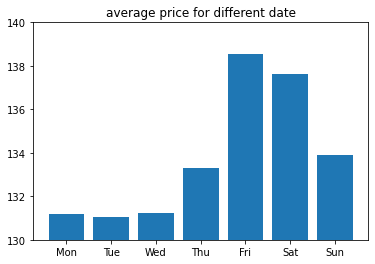

In [35]:
x = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.bar(x,dayofweek_price_mean['price'])
plt.title('average price for different date')
plt.ylim(130,140);

In [36]:
describe = calendar.groupby(['listing_id','weekday'])['price'].describe().reset_index()

In [37]:
for i in describe['listing_id'].unique():
    print(i)
    print(describe.query('listing_id == @i')['std'])

3335
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
Name: std, dtype: float64
4291
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
Name: std, dtype: float64
5682
14    4.879684
15    5.190925
16    4.975809
17    4.956066
18    4.165641
19    4.025700
20    4.937734
Name: std, dtype: float64
6606
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
Name: std, dtype: float64
7369
28    0.000000
29    0.000000
30    0.000000
31    0.000000
32    0.000000
33    0.000000
34    6.381534
Name: std, dtype: float64
9419
35     9.424669
36     9.473309
37     9.473309
38     9.473309
39    13.981241
40    13.981241
41     9.320828
Name: std, dtype: float64
9460
42     3.418128
43     3.974845
44    11.924536
45     9.520954
46     8.072074
47     2.690691
48    22.991998
Name: std, dtype: float64
9531
49    5.852567
50    5.899485
51    6.298268
52    6.298268
53    5.812557
54    5.812557
55    5.899485
Name: std, dtype: float64
9534
56   

686     0.000000
687     0.000000
688     0.000000
689     0.000000
690     7.731934
691     7.477341
692    88.254397
Name: std, dtype: float64
186328
693    0.0
694    0.0
695    0.0
696    0.0
697    0.0
698    0.0
699    0.0
Name: std, dtype: float64
189156
700     4.364971
701     4.081143
702     4.268514
703     4.671203
704     3.929382
705     3.407914
706    12.737680
Name: std, dtype: float64
190984
707    21.562041
708    21.699398
709    21.619289
710    21.025114
711    25.391326
712    24.850807
713    19.281700
Name: std, dtype: float64
193371
714    0.000000
715    0.000000
716    0.000000
717    4.803845
718    0.000000
719    4.803845
720    0.000000
Name: std, dtype: float64
193836
721    0.0
722    0.0
723    0.0
724    0.0
725    0.0
726    0.0
727    0.0
Name: std, dtype: float64
194313
728    0.0
729    0.0
730    0.0
731    0.0
732    0.0
733    0.0
734    0.0
Name: std, dtype: float64
202174
735    0.0
736    0.0
737    0.0
738    0.0
739    0.0
740    0.0
741

1148    40.351324
1149    40.305676
1150    40.305676
1151    42.627906
1152    41.175575
1153    34.577279
1154    36.935801
Name: std, dtype: float64
353110
1155    11.824184
1156    11.894141
1157    11.894141
1158    11.894141
1159    11.645078
1160    11.645078
1161    11.645078
Name: std, dtype: float64
353347
1162    0.0
1163    0.0
1164    0.0
1165    0.0
1166    0.0
1167    0.0
1168    0.0
Name: std, dtype: float64
354453
1169    0.0
1170    0.0
1171    0.0
1172    0.0
1173    0.0
1174    0.0
1175    0.0
Name: std, dtype: float64
356566
1176    0.0
1177    0.0
1178    0.0
1179    0.0
1180    0.0
1181    0.0
1182    0.0
Name: std, dtype: float64
356608
1183    33.316880
1184    33.633640
1185    33.633640
1186    33.633640
1187    33.633640
1188    33.027252
1189    33.027252
Name: std, dtype: float64
363064
1190     0.000000
1191     0.000000
1192     0.000000
1193     0.000000
1194    14.863634
1195    14.863634
1196     7.567569
Name: std, dtype: float64
365550
1197    14.48

1862    0.0
1863    0.0
1864    0.0
1865    0.0
1866    0.0
1867    0.0
1868    0.0
Name: std, dtype: float64
668169
1869     0.000000
1870     0.000000
1871     0.000000
1872     0.000000
1873     0.000000
1874     0.000000
1875    51.052276
Name: std, dtype: float64
670009
1876    0.000000
1877    0.000000
1878    0.000000
1879    0.000000
1880    2.976783
1881    2.976783
1882    0.000000
Name: std, dtype: float64
670021
1883    0.0
1884    0.0
1885    0.0
1886    0.0
1887    0.0
1888    0.0
1889    0.0
Name: std, dtype: float64
670056
1890    0.0
1891    0.0
1892    0.0
1893    0.0
1894    0.0
1895    0.0
1896    0.0
Name: std, dtype: float64
670262
1897    0.0
1898    0.0
1899    0.0
1900    0.0
1901    0.0
1902    0.0
1903    0.0
Name: std, dtype: float64
671828
1904    0.0
1905    0.0
1906    0.0
1907    0.0
1908    0.0
1909    0.0
1910    0.0
Name: std, dtype: float64
674113
1911    0.0
1912    0.0
1913    0.0
1914    0.0
1915    0.0
1916    0.0
1917    0.0
Name: std, dtype: fl

2653     0.000000
2654     0.000000
2655     0.000000
2656     0.000000
2657     0.000000
2658     0.000000
2659    12.612615
Name: std, dtype: float64
988176
2660    5.901957
2661    5.953566
2662    5.953566
2663    5.953566
2664    5.953566
2665    5.953566
2666    5.381382
Name: std, dtype: float64
991961
2667      0.000000
2668      0.000000
2669      0.000000
2670      0.000000
2671      0.000000
2672      0.000000
2673    114.018039
Name: std, dtype: float64
995443
2674    0.0
2675    0.0
2676    0.0
2677    0.0
2678    0.0
2679    0.0
2680    0.0
Name: std, dtype: float64
1000883
2681     6.594463
2682     6.644240
2683     6.644240
2684     6.644240
2685    16.453005
2686    15.407976
2687     6.140634
Name: std, dtype: float64
1002835
2688    2.666788
2689    2.690691
2690    2.690691
2691    2.690691
2692    2.976783
2693    2.690691
2694    2.690691
Name: std, dtype: float64
1003890
2695     4.859193
2696     4.618925
2697     2.912694
2698     2.538690
2699     9.026586
27

Name: std, dtype: float64
1163345
3059    29.235493
3060    29.805472
3061    29.432048
3062    28.508175
3063    25.280687
3064    28.411303
3065    27.780681
Name: std, dtype: float64
1167507
3066    0.000000
3067    0.000000
3068    0.000000
3069    0.000000
3070    7.286426
3071    7.286426
3072    0.000000
Name: std, dtype: float64
1171574
3073    4.213549
3074    4.285925
3075    4.285925
3076    4.285925
3077    4.134385
3078    4.115416
3079    4.183751
Name: std, dtype: float64
1175308
3080    0.0
3081    0.0
3082    0.0
3083    0.0
3084    0.0
3085    0.0
3086    0.0
Name: std, dtype: float64
1179538
3087    32.542024
3088    32.542831
3089    32.740461
3090    34.878517
3091    34.922128
3092    36.015807
3093    40.172498
Name: std, dtype: float64
1184846
3094    0.0
3095    0.0
3096    0.0
3097    0.0
3098    0.0
3099    0.0
3100    0.0
Name: std, dtype: float64
1187735
3101    25.520702
3102    25.669761
3103    25.669761
3104    25.669761
3105    25.257908
3106    25.257

3843    3.790600
3844    3.820047
3845    3.820047
3846    3.820047
3847    3.643213
3848    3.643213
3849    3.643213
Name: std, dtype: float64
1557314
3850    4.974536
3851    4.954545
3852    4.954545
3853    4.954545
3854    4.954545
3855    4.954545
3856    4.954545
Name: std, dtype: float64
1561256
3857    14.769909
3858    15.011748
3859    15.043677
3860    14.642175
3861    18.258864
3862    17.995506
3863    14.037052
Name: std, dtype: float64
1562643
3864    1.923802
3865    1.941839
3866    0.000000
3867    0.000000
3868    0.000000
3869    0.000000
3870    0.000000
Name: std, dtype: float64
1566487
3871     2.666788
3872     2.976783
3873     2.976783
3874     2.976783
3875    15.215892
3876    15.215892
3877     6.066499
Name: std, dtype: float64
1571230
3878    0.0
3879    0.0
3880    0.0
3881    0.0
3882    0.0
3883    0.0
3884    0.0
Name: std, dtype: float64
1579615
3885    12.636598
3886    12.574724
3887    12.724900
3888    12.724900
3889    13.155698
3890    13.15

Name: std, dtype: float64
1781723
4291     1.999637
4292     2.382297
4293     1.703071
4294     6.296681
4295     0.850871
4296     4.679792
4297    13.144687
Name: std, dtype: float64
1781873
4298    0.000000
4299    0.000000
4300    0.000000
4301    0.000000
4302    0.000000
4303    0.000000
4304    1.513514
Name: std, dtype: float64
1782140
4305    0.0
4306    0.0
4307    0.0
4308    0.0
4309    0.0
4310    0.0
4311    0.0
Name: std, dtype: float64
1783382
4312    0.0
4313    0.0
4314    0.0
4315    0.0
4316    0.0
4317    0.0
4318    0.0
Name: std, dtype: float64
1786923
4319    0.0
4320    0.0
4321    0.0
4322    0.0
4323    0.0
4324    0.0
4325    0.0
Name: std, dtype: float64
1789341
4326    0.0
4327    0.0
4328    0.0
4329    0.0
4330    0.0
4331    0.0
4332    0.0
Name: std, dtype: float64
1790020
4333    11.256348
4334    10.426428
4335     9.147278
4336     7.570683
4337     4.440829
4338     4.440829
4339     7.890178
Name: std, dtype: float64
1793138
4340    0.0
4341    0

Name: std, dtype: float64
1980283
4739    0.0
4740    0.0
4741    0.0
4742    0.0
4743    0.0
4744    0.0
4745    0.0
Name: std, dtype: float64
1980395
4746    0.0
4747    0.0
4748    0.0
4749    0.0
4750    0.0
4751    0.0
4752    0.0
Name: std, dtype: float64
1983713
4753    0.0
4754    0.0
4755    0.0
4756    0.0
4757    0.0
4758    0.0
4759    0.0
Name: std, dtype: float64
1984692
4760    0.0
4761    0.0
4762    0.0
4763    0.0
4764    0.0
4765    0.0
4766    0.0
Name: std, dtype: float64
1984962
4767    22.254955
4768    22.394381
4769    23.302069
4770    23.302069
4771    24.311794
4772    24.311794
4773    24.019223
Name: std, dtype: float64
2004931
4774    67.104380
4775    67.404969
4776    68.222893
4777    67.682951
4778    68.021476
4779    67.696878
4780    55.839946
Name: std, dtype: float64
2011193
4781    42.251579
4782    42.543563
4783    42.543563
4784    42.543563
4785    42.543563
4786    45.746696
4787    44.788762
Name: std, dtype: float64
2016613
4788    0.0
47

5208    0.000000
5209    0.000000
5210    0.000000
5211    0.000000
5212    4.036037
5213    0.000000
5214    0.000000
Name: std, dtype: float64
2387265
5215     0.000000
5216     0.000000
5217     0.000000
5218     0.000000
5219     0.000000
5220     0.000000
5221    28.078752
Name: std, dtype: float64
2387605
5222    11.686520
5223    11.773375
5224    12.548548
5225    11.509390
5226    13.099860
5227    14.475170
5228    20.386490
Name: std, dtype: float64
2391699
5229    1.687700
5230    1.534422
5231    1.490037
5232    1.550921
5233    0.706306
5234    1.649078
5235    1.474136
Name: std, dtype: float64
2392869
5236    22.650785
5237    22.552202
5238    20.910605
5239    20.910605
5240    21.192076
5241    21.192076
5242    26.643978
Name: std, dtype: float64
2396734
5243    21.215683
5244    23.133449
5245    22.383467
5246    21.624347
5247    15.147975
5248    12.536087
5249    16.476994
Name: std, dtype: float64
2399736
5250    25.316573
5251    25.440316
5252    24.743023


5971     0.000000
5972     0.000000
5973     0.000000
5974     0.000000
5975     0.000000
5976     0.000000
5977    39.855863
Name: std, dtype: float64
2830174
5978    0.0
5979    0.0
5980    0.0
5981    0.0
5982    0.0
5983    0.0
5984    0.0
Name: std, dtype: float64
2836237
5985    0.0
5986    0.0
5987    0.0
5988    0.0
5989    0.0
5990    0.0
5991    0.0
Name: std, dtype: float64
2856806
5992    0.0
5993    0.0
5994    0.0
5995    0.0
5996    0.0
5997    0.0
5998    0.0
Name: std, dtype: float64
2858482
5999     0.000000
6000     0.000000
6001     0.000000
6002     0.000000
6003     0.000000
6004     0.000000
6005    16.648652
Name: std, dtype: float64
2865992
6006    0.0
6007    0.0
6008    0.0
6009    0.0
6010    0.0
6011    0.0
6012    0.0
Name: std, dtype: float64
2868006
6013    0.0
6014    0.0
6015    0.0
6016    0.0
6017    0.0
6018    0.0
6019    0.0
Name: std, dtype: float64
2875975
6020    0.0
6021    0.0
6022    0.0
6023    0.0
6024    0.0
6025    0.0
6026    0.0
Name: 

Name: std, dtype: float64
3281072
6755    17.057701
6756    17.190212
6757    17.190212
6758    17.190212
6759    17.190212
6760    17.190212
6761    16.394459
Name: std, dtype: float64
3282000
6762    5.852567
6763    3.867869
6764    3.867869
6765    3.867869
6766    3.708608
6767    3.708608
6768    3.725093
Name: std, dtype: float64
3282760
6769    0.0
6770    0.0
6771    0.0
6772    0.0
6773    0.0
6774    0.0
6775    0.0
Name: std, dtype: float64
3291295
6776    0.000000
6777    0.000000
6778    0.000000
6779    4.372373
6780    0.000000
6781    4.254356
6782    0.000000
Name: std, dtype: float64
3291777
6783    0.0
6784    0.0
6785    0.0
6786    0.0
6787    0.0
6788    0.0
6789    0.0
Name: std, dtype: float64
3293438
6790    11.365290
6791    11.386531
6792    11.329878
6793    11.519542
6794    11.715375
6795    11.499410
6796    29.187301
Name: std, dtype: float64
3294243
6797    0.0
6798    0.0
6799    0.0
6800    0.0
6801    0.0
6802    0.0
6803    0.0
Name: std, dtype: fl

Name: std, dtype: float64
3630581
7560     0.000000
7561     0.000000
7562     0.000000
7563     0.000000
7564     0.000000
7565     0.000000
7566    10.291747
Name: std, dtype: float64
3637180
7567    1.895300
7568    1.910024
7569    1.910024
7570    1.910024
7571    1.488391
7572    1.345346
7573    1.345346
Name: std, dtype: float64
3639023
7574    0.0
7575    0.0
7576    0.0
7577    0.0
7578    0.0
7579    0.0
7580    0.0
Name: std, dtype: float64
3642289
7581    0.0
7582    0.0
7583    0.0
7584    0.0
7585    0.0
7586    0.0
7587    0.0
Name: std, dtype: float64
3646393
7588     9.959461
7589    10.680539
7590    10.464531
7591     9.767200
7592     8.435810
7593     7.108378
7594     7.336426
Name: std, dtype: float64
3652434
7595    0.0
7596    0.0
7597    0.0
7598    0.0
7599    0.0
7600    0.0
7601    0.0
Name: std, dtype: float64
3652612
7602    0.0
7603    0.0
7604    0.0
7605    0.0
7606    0.0
7607    0.0
7608    0.0
Name: std, dtype: float64
3653575
7609    0.0
7610    0

8428    6.484882
8429    6.521805
8430    6.661244
8431    6.661244
8432    6.419093
8433    6.419093
8434    6.395553
Name: std, dtype: float64
3951768
8435    0.000000
8436    0.000000
8437    0.000000
8438    2.623424
8439    0.000000
8440    2.623424
8441    6.806970
Name: std, dtype: float64
3953365
8442     0.000000
8443     0.416025
8444     0.416025
8445     0.416025
8446     0.416025
8447     0.000000
8448    17.868296
Name: std, dtype: float64
3953611
8449    16.571217
8450    16.658218
8451    16.658218
8452    16.658218
8453    21.443004
8454    21.600121
8455    17.816435
Name: std, dtype: float64
3959442
8456    28.629496
8457    28.359495
8458    28.359495
8459    28.359495
8460    21.932469
8461    21.932469
8462    28.359495
Name: std, dtype: float64
3959460
8463     0.000000
8464     0.000000
8465     0.000000
8466     2.524391
8467     0.000000
8468     2.522523
8469    43.891900
Name: std, dtype: float64
3961077
8470     0.575252
8471     0.533564
8472     0.357530


8841    17.057701
8842    16.394459
8843    16.394459
8844    16.394459
8845    18.216065
8846    18.216065
8847    16.394459
Name: std, dtype: float64
4084712
8848    0.000000
8849    0.000000
8850    0.000000
8851    3.446423
8852    0.000000
8853    4.254356
8854    4.254356
Name: std, dtype: float64
4085439
8855    0.0
8856    0.0
8857    0.0
8858    0.0
8859    0.0
8860    0.0
8861    0.0
Name: std, dtype: float64
4092037
8862    0.0
8863    0.0
8864    0.0
8865    0.0
8866    0.0
8867    0.0
8868    0.0
Name: std, dtype: float64
4100009
8869    3.418128
8870    2.690691
8871    2.690691
8872    2.690691
8873    2.690691
8874    2.690691
8875    8.965158
Name: std, dtype: float64
4104442
8876    0.0
8877    0.0
8878    0.0
8879    0.0
8880    0.0
8881    0.0
8882    0.0
Name: std, dtype: float64
4105081
8883    0.0
8884    0.0
8885    0.0
8886    0.0
8887    0.0
8888    0.0
8889    0.0
Name: std, dtype: float64
4105164
8890    9.562870
8891    9.746311
8892    9.740273
8893    9.5

9282    73.826760
9283    73.346304
9284    73.346304
9285    73.346304
9286    78.446154
9287    78.446154
9288    74.886218
Name: std, dtype: float64
4250938
9289    65.388495
9290    65.495132
9291    65.495132
9292    65.495132
9293    58.811764
9294    58.811764
9295    66.931458
Name: std, dtype: float64
4251235
9296    100.084507
9297     98.132640
9298     98.132640
9299     97.648975
9300     86.837342
9301     86.837342
9302     99.782711
Name: std, dtype: float64
4251426
9303    100.084507
9304    100.283723
9305     98.132640
9306    100.283723
9307     87.432801
9308     87.432801
9309    100.283723
Name: std, dtype: float64
4252591
9310    0.0
9311    0.0
9312    0.0
9313    0.0
9314    0.0
9315    0.0
9316    0.0
Name: std, dtype: float64
4256558
9317    69.597021
9318    59.311790
9319    61.507320
9320    62.761763
9321    76.073105
9322    80.054570
9323    78.198945
Name: std, dtype: float64
4256705
9324    11.664766
9325     9.709195
9326     9.709195
9327    11.771

Name: std, dtype: float64
4423130
9751    0.699886
9752    0.706306
9753    0.706306
9754    0.706306
9755    0.706306
9756    0.706306
9757    0.582552
Name: std, dtype: float64
4429898
9758    0.0
9759    0.0
9760    0.0
9761    0.0
9762    0.0
9763    0.0
9764    0.0
Name: std, dtype: float64
4430233
9765    28.349621
9766    28.588594
9767    28.932751
9768    28.932751
9769    28.932751
9770    28.588594
9771    27.718010
Name: std, dtype: float64
4430381
9772    29.185235
9773    28.588594
9774    29.240641
9775    29.240641
9776    29.240641
9777    28.932751
9778    28.588594
Name: std, dtype: float64
4432489
9779    7.284395
9780    7.255803
9781    8.477101
9782    7.622504
9783    8.491145
9784    7.915537
9785    8.631557
Name: std, dtype: float64
4438160
9786     0.000000
9787     0.000000
9788     0.000000
9789     0.000000
9790     0.000000
9791     0.000000
9792    19.794419
Name: std, dtype: float64
4438188
9793     4.937931
9794     4.954545
9795     4.954545
9796    

10185     0.000000
10186     0.000000
10187     0.000000
10188     0.000000
10189     0.000000
10190     0.000000
10191    57.009019
Name: std, dtype: float64
4599119
10192    0.0
10193    0.0
10194    0.0
10195    0.0
10196    0.0
10197    0.0
10198    0.0
Name: std, dtype: float64
4607830
10199     6.394392
10200     6.871449
10201     6.077522
10202     4.627122
10203     0.000000
10204     0.000000
10205    17.231806
Name: std, dtype: float64
4608208
10206    0.0
10207    0.0
10208    0.0
10209    0.0
10210    0.0
10211    0.0
10212    0.0
Name: std, dtype: float64
4608592
10213    4.863895
10214    4.254356
10215    4.254356
10216    4.254356
10217    4.372373
10218    4.478876
10219    4.372373
Name: std, dtype: float64
4614955
10220    18.306058
10221    20.228512
10222    19.125489
10223    17.660479
10224    16.987119
10225    16.810395
10226    16.546144
Name: std, dtype: float64
4616634
10227    0.000000
10228    0.000000
10229    0.000000
10230    0.000000
10231    0.000000

10654    10.645222
10655    10.721977
10656    10.721977
10657     3.605551
10658     0.000000
10659    11.061326
10660    16.086118
Name: std, dtype: float64
4777832
10661    24.287615
10662    27.338474
10663    20.490921
10664    14.418649
10665    11.124010
10666    43.220483
10667    28.610217
Name: std, dtype: float64
4782745
10668    0.0
10669    0.0
10670    0.0
10671    0.0
10672    0.0
10673    0.0
10674    0.0
Name: std, dtype: float64
4783585
10675    67.992551
10676    66.464747
10677    67.227401
10678    66.628288
10679    69.404741
10680    70.063137
10681    68.958466
Name: std, dtype: float64
4783817
10682     1.373606
10683     0.000000
10684     0.000000
10685     0.000000
10686     0.000000
10687     0.000000
10688    31.907672
Name: std, dtype: float64
4784639
10689    73.874172
10690    72.802580
10691    74.169794
10692    73.964526
10693    75.955085
10694    76.187462
10695    74.484807
Name: std, dtype: float64
4787415
10696    0.0
10697    0.0
10698    0.0
1

11067    0.0
11068    0.0
11069    0.0
11070    0.0
11071    0.0
11072    0.0
11073    0.0
Name: std, dtype: float64
4995903
11074     0.000000
11075     0.000000
11076     0.000000
11077     0.000000
11078     0.000000
11079     0.000000
11080    20.846346
Name: std, dtype: float64
4996554
11081     5.333575
11082     5.381382
11083     5.381382
11084     5.381382
11085    18.834838
11086    18.834838
11087     4.708710
Name: std, dtype: float64
5002964
11088    0.0
11089    0.0
11090    0.0
11091    0.0
11092    0.0
11093    0.0
11094    0.0
Name: std, dtype: float64
5006092
11095     7.967641
11096     0.000000
11097    13.631710
11098    13.469422
11099    28.240904
11100    28.240904
11101    53.084241
Name: std, dtype: float64
5014835
11102    0.0
11103    0.0
11104    0.0
11105    0.0
11106    0.0
11107    0.0
11108    0.0
Name: std, dtype: float64
5015262
11109    0.0
11110    0.0
11111    0.0
11112    0.0
11113    0.0
11114    0.0
11115    0.0
Name: std, dtype: float64
5019444

Name: std, dtype: float64
5228066
11550    0.0
11551    0.0
11552    0.0
11553    0.0
11554    0.0
11555    0.0
11556    0.0
Name: std, dtype: float64
5229971
11557    0.0
11558    0.0
11559    0.0
11560    0.0
11561    0.0
11562    0.0
11563    0.0
Name: std, dtype: float64
5236979
11564     5.565092
11565     4.802078
11566     5.148767
11567     3.284120
11568     4.742025
11569     9.252512
11570    33.557109
Name: std, dtype: float64
5240694
11571    0.0
11572    0.0
11573    0.0
11574    0.0
11575    0.0
11576    0.0
11577    0.0
Name: std, dtype: float64
5241195
11578    0.0
11579    0.0
11580    0.0
11581    0.0
11582    0.0
11583    0.0
11584    0.0
Name: std, dtype: float64
5241773
11585     7.499395
11586     7.538238
11587     7.538238
11588     7.538238
11589     7.530731
11590     7.530731
11591    90.149030
Name: std, dtype: float64
5242148
11592    125.304795
11593    108.266939
11594    109.315069
11595    111.864677
11596    123.810997
11597    123.810997
11598    130

11956    0.0
11957    0.0
11958    0.0
11959    0.0
11960    0.0
11961    0.0
11962    0.0
Name: std, dtype: float64
5405643
11963    27.140913
11964    26.497296
11965    26.491603
11966    25.966332
11967    26.318583
11968    26.601998
11969    26.662405
Name: std, dtype: float64
5407311
11970    0.000000
11971    0.000000
11972    0.000000
11973    3.315658
11974    0.000000
11975    3.315658
11976    0.960769
Name: std, dtype: float64
5413564
11977    2.666788
11978    2.690691
11979    2.690691
11980    2.690691
11981    2.690691
11982    2.690691
11983    2.690691
Name: std, dtype: float64
5415077
11984    2.530654
11985    3.033250
11986    2.136023
11987    3.531532
11988    3.575305
11989    3.965348
11990    3.967962
Name: std, dtype: float64
5422159
11991    27.912365
11992    27.397829
11993    27.386816
11994    27.386816
11995     7.498114
11996     7.498114
11997    27.758792
Name: std, dtype: float64
5422881
11998    0.0
11999    0.0
12000    0.0
12001    0.0
12002    

12411    19.562746
12412    18.594344
12413    18.355054
12414    18.213861
12415    17.964982
12416    18.004189
12417    18.340051
Name: std, dtype: float64
5637990
12418    0.000000
12419    0.000000
12420    0.000000
12421    0.000000
12422    0.000000
12423    0.000000
12424    8.508713
Name: std, dtype: float64
5639238
12425    0.0
12426    0.0
12427    0.0
12428    0.0
12429    0.0
12430    0.0
12431    0.0
Name: std, dtype: float64
5640214
12432     3.418128
12433     3.226025
12434     3.226025
12435     3.446423
12436     6.726728
12437     5.488058
12438    10.325034
Name: std, dtype: float64
5640722
12439    5.326768
12440    5.346338
12441    5.346338
12442    5.346338
12443    5.296453
12444    5.327155
12445    5.263602
Name: std, dtype: float64
5643240
12446     0.000000
12447     0.000000
12448     0.000000
12449     0.000000
12450     0.000000
12451     0.000000
12452    40.360368
Name: std, dtype: float64
5648564
12453    21.718612
12454    21.856475
12455    21.8402

Name: std, dtype: float64
5905958
12873    0.0
12874    0.0
12875    0.0
12876    0.0
12877    0.0
12878    0.0
12879    0.0
Name: std, dtype: float64
5913611
12880    0.0
12881    0.0
12882    0.0
12883    0.0
12884    0.0
12885    0.0
12886    0.0
Name: std, dtype: float64
5918259
12887     0.000000
12888     0.000000
12889     0.000000
12890     0.000000
12891     0.000000
12892     0.000000
12893    14.630633
Name: std, dtype: float64
5919096
12894     8.450316
12895     8.744746
12896     8.744746
12897     7.286426
12898     6.892845
12899     7.286426
12900    10.784377
Name: std, dtype: float64
5927083
12901    0.0
12902    0.0
12903    0.0
12904    0.0
12905    0.0
12906    0.0
12907    0.0
Name: std, dtype: float64
5930473
12908    4.712334
12909    4.736655
12910    4.736655
12911    4.736655
12912    4.736655
12913    4.736655
12914    4.660414
Name: std, dtype: float64
5930806
12915    0.0
12916    0.0
12917    0.0
12918    0.0
12919    0.0
12920    0.0
12921    0.0
Name: 

13307    11.584046
13308    11.697594
13309    11.336666
13310    10.914103
13311     9.816779
13312     9.445406
13313    24.492773
Name: std, dtype: float64
6107901
13314    0.0
13315    0.0
13316    0.0
13317    0.0
13318    0.0
13319    0.0
13320    0.0
Name: std, dtype: float64
6108006
13321    14.977438
13322    15.380199
13323    15.412417
13324    15.361211
13325    37.886550
13326    36.876598
13327    11.836668
Name: std, dtype: float64
6108796
13328    16.611042
13329     9.410289
13330     7.479963
13331     5.443907
13332    12.776888
13333     4.317831
13334    76.320057
Name: std, dtype: float64
6115704
13335    0.0
13336    0.0
13337    0.0
13338    0.0
13339    0.0
13340    0.0
13341    0.0
Name: std, dtype: float64
6115807
13342      0.000000
13343      0.000000
13344      0.000000
13345     25.075301
13346      0.000000
13347     25.075301
13348    150.657984
Name: std, dtype: float64
6117473
13349    0.0
13350    0.0
13351    0.0
13352    0.0
13353    0.0
13354    0

13748    59.704418
13749    57.559815
13750    57.559815
13751    57.481937
13752    53.322491
13753    53.322491
13754    59.089328
Name: std, dtype: float64
6272065
13755    0.0
13756    0.0
13757    0.0
13758    0.0
13759    0.0
13760    0.0
13761    0.0
Name: std, dtype: float64
6274351
13762    0.0
13763    0.0
13764    0.0
13765    0.0
13766    0.0
13767    0.0
13768    0.0
Name: std, dtype: float64
6276224
13769    0.0
13770    0.0
13771    0.0
13772    0.0
13773    0.0
13774    0.0
13775    0.0
Name: std, dtype: float64
6278181
13776    0.0
13777    0.0
13778    0.0
13779    0.0
13780    0.0
13781    0.0
13782    0.0
Name: std, dtype: float64
6278191
13783     0.000000
13784     0.000000
13785     0.000000
13786    15.740543
13787     0.000000
13788    15.315683
13789     2.978049
Name: std, dtype: float64
6278216
13790    10.580914
13791    10.680115
13792     0.000000
13793     0.000000
13794     0.000000
13795     0.000000
13796     7.627128
Name: std, dtype: float64
6278361

Name: std, dtype: float64
6424859
14238    22.364541
14239     0.000000
14240     0.000000
14241     3.820047
14242     0.000000
14243     3.820047
14244    22.538278
Name: std, dtype: float64
6424982
14245    6.904911
14246    6.779772
14247    6.870928
14248    6.870928
14249    6.870928
14250    6.779772
14251    6.779772
Name: std, dtype: float64
6425537
14252    0.0
14253    0.0
14254    0.0
14255    0.0
14256    0.0
14257    0.0
14258    0.0
Name: std, dtype: float64
6425652
14259    0.0
14260    0.0
14261    0.0
14262    0.0
14263    0.0
14264    0.0
14265    0.0
Name: std, dtype: float64
6425735
14266    0.0
14267    0.0
14268    0.0
14269    0.0
14270    0.0
14271    0.0
14272    0.0
Name: std, dtype: float64
6426462
14273    0.000000
14274    0.000000
14275    0.000000
14276    4.372373
14277    4.372373
14278    4.372373
14279    0.000000
Name: std, dtype: float64
6436727
14280    0.0
14281    0.0
14282    0.0
14283    0.0
14284    0.0
14285    0.0
14286    0.0
Name: std, dt

Name: std, dtype: float64
6572501
14700    0.0
14701    0.0
14702    0.0
14703    0.0
14704    0.0
14705    0.0
14706    0.0
Name: std, dtype: float64
6575380
14707    0.0
14708    0.0
14709    0.0
14710    0.0
14711    0.0
14712    0.0
14713    0.0
Name: std, dtype: float64
6575407
14714    0.0
14715    0.0
14716    0.0
14717    0.0
14718    0.0
14719    0.0
14720    0.0
Name: std, dtype: float64
6576006
14721    2.112579
14722    2.367770
14723    2.367770
14724    1.910024
14725    3.838511
14726    3.820047
14727    1.821607
Name: std, dtype: float64
6576228
14728    0.0
14729    0.0
14730    0.0
14731    0.0
14732    0.0
14733    0.0
14734    0.0
Name: std, dtype: float64
6577295
14735    4.503909
14736    3.986544
14737    4.975771
14738    4.208866
14739    2.391539
14740    1.852396
14741    3.591720
Name: std, dtype: float64
6577729
14742    40.867942
14743    40.013478
14744    40.013478
14745    39.849793
14746    36.857886
14747    36.857886
14748    40.479181
Name: std, dt

15106    14.552842
15107    14.638943
15108    14.638943
15109    14.638943
15110     0.000000
15111     0.000000
15112    14.913324
Name: std, dtype: float64
6691324
15113    40.487101
15114    40.684541
15115    40.684541
15116    40.684541
15117    40.684541
15118    40.347753
15119    40.039926
Name: std, dtype: float64
6691873
15120    0.0
15121    0.0
15122    0.0
15123    0.0
15124    0.0
15125    0.0
15126    0.0
Name: std, dtype: float64
6694276
15127    0.000000
15128    0.000000
15129    0.000000
15130    0.000000
15131    0.000000
15132    0.000000
15133    4.160251
Name: std, dtype: float64
6701018
15134    32.990114
15135    32.657462
15136    32.329813
15137    31.541128
15138    29.190712
15139    28.865077
15140    33.118303
Name: std, dtype: float64
6704004
15141    38.295410
15142    33.892581
15143    36.288271
15144    41.747301
15145    28.376402
15146    28.633166
15147    57.630147
Name: std, dtype: float64
6704734
15148    0.0
15149    0.0
15150    0.0
15151   

Name: std, dtype: float64
6807981
15540     9.925996
15541    10.893354
15542    10.893354
15543    12.671910
15544    11.957693
15545    11.957693
15546     9.533303
Name: std, dtype: float64
6808970
15547    0.0
15548    0.0
15549    0.0
15550    0.0
15551    0.0
15552    0.0
15553    0.0
Name: std, dtype: float64
6810430
15554    0.0
15555    0.0
15556    0.0
15557    0.0
15558    0.0
15559    0.0
15560    0.0
Name: std, dtype: float64
6811792
15561    0.0
15562    0.0
15563    0.0
15564    0.0
15565    0.0
15566    0.0
15567    0.0
Name: std, dtype: float64
6812054
15568    0.0
15569    0.0
15570    0.0
15571    0.0
15572    0.0
15573    0.0
15574    0.0
Name: std, dtype: float64
6812415
15575     0.000000
15576     0.000000
15577     0.000000
15578     4.372373
15579     0.000000
15580     4.254356
15581    17.442861
Name: std, dtype: float64
6813483
15582    11.474715
15583    11.367971
15584    11.367971
15585    11.367971
15586     6.457659
15587     6.457659
15588    11.367971

15981    0.0
15982    0.0
15983    0.0
15984    0.0
15985    0.0
15986    0.0
15987    0.0
Name: std, dtype: float64
6935953
15988    0.0
15989    0.0
15990    0.0
15991    0.0
15992    0.0
15993    0.0
15994    0.0
Name: std, dtype: float64
6937071
15995    0.0
15996    0.0
15997    0.0
15998    0.0
15999    0.0
16000    0.0
16001    0.0
Name: std, dtype: float64
6937492
16002    0.0
16003    0.0
16004    0.0
16005    0.0
16006    0.0
16007    0.0
16008    0.0
Name: std, dtype: float64
6938103
16009    8.887133
16010    8.960699
16011    8.960699
16012    8.960699
16013    8.960699
16014    8.960699
16015    8.960699
Name: std, dtype: float64
6938542
16016    0.0
16017    0.0
16018    0.0
16019    0.0
16020    0.0
16021    0.0
16022    0.0
Name: std, dtype: float64
6939106
16023    11.444001
16024     6.215190
16025    11.402350
16026    11.350843
16027    11.336932
16028     9.068097
16029    49.232342
Name: std, dtype: float64
6939472
16030    0.0
16031    0.0
16032    0.0
16033    

Name: std, dtype: float64
7201336
16793    2.868679
16794    2.928252
16795    2.928252
16796    2.206189
16797    3.454236
16798    3.498060
16799    2.157103
Name: std, dtype: float64
7202016
16800    6.582071
16801    6.644950
16802    6.644950
16803    6.644950
16804    6.644950
16805    6.644950
16806    6.463729
Name: std, dtype: float64
7203408
16807    0.0
16808    0.0
16809    0.0
16810    0.0
16811    0.0
16812    0.0
16813    0.0
Name: std, dtype: float64
7203765
16814    0.0
16815    0.0
16816    0.0
16817    0.0
16818    0.0
16819    0.0
16820    0.0
Name: std, dtype: float64
7204672
16821    0.0
16822    0.0
16823    0.0
16824    0.0
16825    0.0
16826    0.0
16827    0.0
Name: std, dtype: float64
7205443
16828    0.0
16829    0.0
16830    0.0
16831    0.0
16832    0.0
16833    0.0
16834    0.0
Name: std, dtype: float64
7207641
16835    0.0
16836    0.0
16837    0.0
16838    0.0
16839    0.0
16840    0.0
16841    0.0
Name: std, dtype: float64
7208439
16842    5.899927
168

Name: std, dtype: float64
7421950
17577    0.0
17578    0.0
17579    0.0
17580    0.0
17581    0.0
17582    0.0
17583    0.0
Name: std, dtype: float64
7421966
17584    0.0
17585    0.0
17586    0.0
17587    0.0
17588    0.0
17589    0.0
17590    0.0
Name: std, dtype: float64
7429207
17591    0.0
17592    0.0
17593    0.0
17594    0.0
17595    0.0
17596    0.0
17597    0.0
Name: std, dtype: float64
7430679
17598    0.0
17599    0.0
17600    0.0
17601    0.0
17602    0.0
17603    0.0
17604    0.0
Name: std, dtype: float64
7430926
17605    31.412248
17606    31.305114
17607    30.638129
17608    31.029933
17609    31.254001
17610    30.237939
17611    31.140870
Name: std, dtype: float64
7431247
17612    0.0
17613    0.0
17614    0.0
17615    0.0
17616    0.0
17617    0.0
17618    0.0
Name: std, dtype: float64
7434103
17619    12.508981
17620    12.606156
17621    12.606156
17622    12.606156
17623    12.606156
17624    12.606156
17625    12.606156
Name: std, dtype: float64
7435912
17626  

18179    20.508768
18180    20.678535
18181    20.678535
18182    20.678535
18183    19.356152
18184    19.356152
18185    19.356152
Name: std, dtype: float64
7603457
18186    21.352151
18187    20.940148
18188    21.525529
18189    22.060822
18190    24.071561
18191    23.617905
18192    22.063599
Name: std, dtype: float64
7604621
18193    0.000000
18194    0.000000
18195    0.000000
18196    0.000000
18197    0.000000
18198    0.000000
18199    8.508713
Name: std, dtype: float64
7614244
18200    0.0
18201    0.0
18202    0.0
18203    0.0
18204    0.0
18205    0.0
18206    0.0
Name: std, dtype: float64
7615170
18207    7.461804
18208    7.483012
18209    7.483012
18210    7.483012
18211    7.431817
18212    7.431817
18213    5.362957
Name: std, dtype: float64
7616008
18214    15.542558
18215    15.127251
18216    15.535332
18217    14.963039
18218    28.388406
18219    27.942545
18220    14.003555
Name: std, dtype: float64
7616031
18221    5.901957
18222    4.708710
18223    5.381382


Name: std, dtype: float64
7714294
18627    0.0
18628    0.0
18629    0.0
18630    0.0
18631    0.0
18632    0.0
18633    0.0
Name: std, dtype: float64
7714585
18634    0.0
18635    0.0
18636    0.0
18637    0.0
18638    0.0
18639    0.0
18640    0.0
Name: std, dtype: float64
7717478
18641    0.0
18642    0.0
18643    0.0
18644    0.0
18645    0.0
18646    0.0
18647    0.0
Name: std, dtype: float64
7717653
18648    0.0
18649    0.0
18650    0.0
18651    0.0
18652    0.0
18653    0.0
18654    0.0
Name: std, dtype: float64
7717813
18655    31.077353
18656    31.212761
18657    31.212761
18658    31.558321
18659    31.486997
18660    31.486997
18661    31.212761
Name: std, dtype: float64
7718139
18662    0.0
18663    0.0
18664    0.0
18665    0.0
18666    0.0
18667    0.0
18668    0.0
Name: std, dtype: float64
7718203
18669    0.0
18670    0.0
18671    0.0
18672    0.0
18673    0.0
18674    0.0
18675    0.0
Name: std, dtype: float64
7724630
18676    0.0
18677    0.0
18678    0.0
18679    0

19334    0.0
19335    0.0
19336    0.0
19337    0.0
19338    0.0
19339    0.0
19340    0.0
Name: std, dtype: float64
7873208
19341    0.445099
19342    0.785185
19343    0.950312
19344    1.128775
19345    0.334087
19346    0.595040
19347    0.556058
Name: std, dtype: float64
7873345
19348    1.472535
19349    1.641629
19350    1.600693
19351    1.567005
19352    1.244445
19353    1.305517
19354    1.335641
Name: std, dtype: float64
7873789
19355    23.069372
19356    23.253181
19357    23.120732
19358    21.495554
19359    16.643034
19360    20.942354
19361    67.816839
Name: std, dtype: float64
7874053
19362    0.0
19363    0.0
19364    0.0
19365    0.0
19366    0.0
19367    0.0
19368    0.0
Name: std, dtype: float64
7875887
19369    6.730668
19370    6.795077
19371    6.795077
19372    6.795077
19373    0.000000
19374    0.000000
19375    6.795077
Name: std, dtype: float64
7881802
19376     53.806654
19377     62.897005
19378     58.516976
19379     43.666236
19380     48.247864
193

19761    0.0
19762    0.0
19763    0.0
19764    0.0
19765    0.0
19766    0.0
19767    0.0
Name: std, dtype: float64
7957904
19768    0.0
19769    0.0
19770    0.0
19771    0.0
19772    0.0
19773    0.0
19774    0.0
Name: std, dtype: float64
7965184
19775    0.0
19776    0.0
19777    0.0
19778    0.0
19779    0.0
19780    0.0
19781    0.0
Name: std, dtype: float64
7967844
19782    34.265388
19783    17.601708
19784    18.567343
19785    22.878944
19786    28.938146
19787    31.190572
19788    40.073965
Name: std, dtype: float64
7968548
19789    9.757956
19790    9.843324
19791    9.843324
19792    9.843324
19793    9.843324
19794    9.525705
19795    8.610212
Name: std, dtype: float64
7969698
19796     4.592699
19797     4.195990
19798     4.041032
19799     3.711911
19800     2.691462
19801     6.578308
19802    26.794811
Name: std, dtype: float64
7970663
19803     0.000000
19804     0.000000
19805     0.000000
19806     0.000000
19807     0.000000
19808     0.000000
19809    42.54356

Name: std, dtype: float64
8054518
20167    0.0
20168    0.0
20169    0.0
20170    0.0
20171    0.0
20172    0.0
20173    0.0
Name: std, dtype: float64
8054892
20174     76.600025
20175     63.287664
20176     68.805985
20177     67.132416
20178     84.485561
20179     95.024479
20180    127.076686
Name: std, dtype: float64
8054902
20181    32.322654
20182    31.822803
20183    32.754601
20184    33.187002
20185    35.808018
20186    37.181767
20187    42.211897
Name: std, dtype: float64
8061699
20188    0.000000
20189    0.000000
20190    0.000000
20191    0.000000
20192    0.000000
20193    0.000000
20194    4.254356
Name: std, dtype: float64
8064351
20195    0.0
20196    0.0
20197    0.0
20198    0.0
20199    0.0
20200    0.0
20201    0.0
Name: std, dtype: float64
8065531
20202    2.335130
20203    0.000000
20204    0.000000
20205    9.984604
20206    9.984604
20207    9.984604
20208    9.984604
Name: std, dtype: float64
8065715
20209    3.200145
20210    3.228829
20211    3.228829
2

20573    31.411520
20574    30.367284
20575    28.256761
20576    28.045125
20577    33.843058
20578    34.910465
20579    31.299621
Name: std, dtype: float64
8132347
20580    27.802773
20581    27.946263
20582    27.946263
20583    27.946263
20584    42.629892
20585    42.629892
20586    23.167011
Name: std, dtype: float64
8136553
20587    0.0
20588    0.0
20589    0.0
20590    0.0
20591    0.0
20592    0.0
20593    0.0
Name: std, dtype: float64
8147215
20594    65.274929
20595    63.260561
20596    63.079829
20597    55.216494
20598    56.487495
20599    60.356345
20600    64.483772
Name: std, dtype: float64
8147986
20601     0.000000
20602     0.000000
20603     0.000000
20604    10.930933
20605     0.000000
20606    10.635891
20607    51.052276
Name: std, dtype: float64
8150045
20608     0.000000
20609     0.000000
20610     0.000000
20611     2.186187
20612     0.000000
20613     2.127178
20614    93.420979
Name: std, dtype: float64
8150145
20615     0.000000
20616     0.000000
20

21371    1.600073
21372    1.339024
21373    1.072591
21374    1.165103
21375    2.760623
21376    2.657696
21377    3.157027
Name: std, dtype: float64
8385444
21378     0.000000
21379     0.000000
21380     0.000000
21381     0.138675
21382    10.200997
21383    10.200997
21384     0.000000
Name: std, dtype: float64
8385687
21385     9.333757
21386    10.418740
21387    11.291089
21388    11.291089
21389    11.291089
21390    11.291089
21391    17.912137
Name: std, dtype: float64
8387068
21392    0.0
21393    0.0
21394    0.0
21395    0.0
21396    0.0
21397    0.0
21398    0.0
Name: std, dtype: float64
8389809
21399    5.68590
21400    5.46482
21401    5.46482
21402    5.46482
21403    0.00000
21404    0.00000
21405    5.46482
Name: std, dtype: float64
8391954
21406    6.836256
21407    6.892845
21408    6.892845
21409    8.957752
21410    7.286426
21411    7.286426
21412    6.892845
Name: std, dtype: float64
8392661
21413    0.0
21414    0.0
21415    0.0
21416    0.0
21417    0.0
214

21791    0.0
21792    0.0
21793    0.0
21794    0.0
21795    0.0
21796    0.0
21797    0.0
Name: std, dtype: float64
8505940
21798    5.730650
21799    5.953661
21800    5.980738
21801    5.891298
21802    5.055051
21803    4.811178
21804    4.196350
Name: std, dtype: float64
8507062
21805    6.421797
21806    6.634273
21807    6.368877
21808    6.408510
21809    5.547818
21810    5.238325
21811    4.278881
Name: std, dtype: float64
8507873
21812    0.0
21813    0.0
21814    0.0
21815    0.0
21816    0.0
21817    0.0
21818    0.0
Name: std, dtype: float64
8508223
21819    0.0
21820    0.0
21821    0.0
21822    0.0
21823    0.0
21824    0.0
21825    0.0
Name: std, dtype: float64
8508341
21826    40.075998
21827    38.296592
21828    39.709897
21829    39.709897
21830    49.425336
21831    49.425336
21832    39.777336
Name: std, dtype: float64
8515408
21833    0.000000
21834    0.000000
21835    0.000000
21836    0.000000
21837    0.000000
21838    0.000000
21839    4.254356
Name: std, d

22190    54.714061
22191    52.533448
22192    52.909154
22193    52.732899
22194    73.094445
22195    73.538039
22196    78.954327
Name: std, dtype: float64
8617043
22197    6.666969
22198    6.726728
22199    7.441957
22200    7.441957
22201    6.726728
22202    6.726728
22203    9.542712
Name: std, dtype: float64
8617171
22204    14.624348
22205     8.377657
22206     5.077194
22207     3.763362
22208     4.380946
22209     4.089635
22210     5.128625
Name: std, dtype: float64
8626068
22211    0.0
22212    0.0
22213    0.0
22214    0.0
22215    0.0
22216    0.0
22217    0.0
Name: std, dtype: float64
8627921
22218    4.465315
22219    3.766317
22220    3.555369
22221    3.535374
22222    4.029445
22223    3.950819
22224    3.969102
Name: std, dtype: float64
8631419
22225     8.956839
22226    16.291498
22227    15.654403
22228    13.264339
22229     3.643213
22230     5.270761
22231    33.141653
Name: std, dtype: float64
8632651
22232    7.037635
22233    7.099673
22234    7.099673


22610     0.000000
22611     0.000000
22612     0.000000
22613     0.000000
22614     7.627128
22615    10.480086
22616     9.776442
Name: std, dtype: float64
8784239
22617    0.0
22618    0.0
22619    0.0
22620    0.0
22621    0.0
22622    0.0
22623    0.0
Name: std, dtype: float64
8785768
22624    0.0
22625    0.0
22626    0.0
22627    0.0
22628    0.0
22629    0.0
22630    0.0
Name: std, dtype: float64
8799162
22631     0.000000
22632     0.000000
22633     0.000000
22634     0.000000
22635     0.000000
22636     0.000000
22637    17.017425
Name: std, dtype: float64
8799588
22638    0.0
22639    0.0
22640    0.0
22641    0.0
22642    0.0
22643    0.0
22644    0.0
Name: std, dtype: float64
8799909
22645    0.0
22646    0.0
22647    0.0
22648    0.0
22649    0.0
22650    0.0
22651    0.0
Name: std, dtype: float64
8805211
22652    12.267933
22653    11.569972
22654    11.569972
22655    11.697594
22656    12.129020
22657    12.129020
22658    41.354061
Name: std, dtype: float64
8811781

Name: std, dtype: float64
8921924
23030    0.0
23031    0.0
23032    0.0
23033    0.0
23034    0.0
23035    0.0
23036    0.0
Name: std, dtype: float64
8922153
23037    0.0
23038    0.0
23039    0.0
23040    0.0
23041    0.0
23042    0.0
23043    0.0
Name: std, dtype: float64
8922554
23044    0.0
23045    0.0
23046    0.0
23047    0.0
23048    0.0
23049    0.0
23050    0.0
Name: std, dtype: float64
8923774
23051    8.511283
23052    8.114007
23053    8.166697
23054    8.363445
23055    7.500628
23056    8.081411
23057    8.640638
Name: std, dtype: float64
8924032
23058     0.000000
23059     0.000000
23060     0.000000
23061     0.000000
23062     4.160251
23063     4.160251
23064    21.925376
Name: std, dtype: float64
8925878
23065    0.0
23066    0.0
23067    0.0
23068    0.0
23069    0.0
23070    0.0
23071    0.0
Name: std, dtype: float64
8926060
23072    0.0
23073    0.0
23074    0.0
23075    0.0
23076    0.0
23077    0.0
23078    0.0
Name: std, dtype: float64
8926188
23079    0.0
2

23443     0.000000
23444     0.000000
23445     0.000000
23446    10.097563
23447     0.000000
23448    10.090092
23449    60.036047
Name: std, dtype: float64
9063355
23450    0.000000
23451    0.000000
23452    0.000000
23453    0.000000
23454    0.000000
23455    0.000000
23456    2.127178
Name: std, dtype: float64
9067268
23457    0.000000
23458    0.000000
23459    0.000000
23460    0.000000
23461    0.000000
23462    0.000000
23463    8.083277
Name: std, dtype: float64
9068366
23464    0.0
23465    0.0
23466    0.0
23467    0.0
23468    0.0
23469    0.0
23470    0.0
Name: std, dtype: float64
9068419
23471    13.249312
23472    12.100322
23473    12.100322
23474    11.267269
23475    12.267060
23476    12.267060
23477    12.543664
Name: std, dtype: float64
9074837
23478    0.0
23479    0.0
23480    0.0
23481    0.0
23482    0.0
23483    0.0
23484    0.0
Name: std, dtype: float64
9075558
23485    0.295098
23486    0.000000
23487    0.000000
23488    1.913968
23489    0.000000
23490 

23870    0.0
23871    0.0
23872    0.0
23873    0.0
23874    0.0
23875    0.0
23876    0.0
Name: std, dtype: float64
9183380
23877    28.777687
23878    32.669716
23879    32.669716
23880    32.385143
23881    33.744649
23882    33.744649
23883    28.960445
Name: std, dtype: float64
9183838
23884     0.000000
23885     0.000000
23886     0.000000
23887     7.286426
23888     0.000000
23889     7.286426
23890    25.138170
Name: std, dtype: float64
9186256
23891    0.0
23892    0.0
23893    0.0
23894    0.0
23895    0.0
23896    0.0
23897    0.0
Name: std, dtype: float64
9186481
23898    29.800376
23899    31.080801
23900    31.080801
23901    31.080801
23902    24.772723
23903    24.772723
23904    30.000471
Name: std, dtype: float64
9186681
23905    0.00000
23906    0.00000
23907    0.00000
23908    0.00000
23909    6.55856
23910    0.00000
23911    0.00000
Name: std, dtype: float64
9189391
23912    0.0
23913    0.0
23914    0.0
23915    0.0
23916    0.0
23917    0.0
23918    0.0
Name:

24605    0.0
24606    0.0
24607    0.0
24608    0.0
24609    0.0
24610    0.0
24611    0.0
Name: std, dtype: float64
9410128
24612    0.0
24613    0.0
24614    0.0
24615    0.0
24616    0.0
24617    0.0
24618    0.0
Name: std, dtype: float64
9410302
24619    0.0
24620    0.0
24621    0.0
24622    0.0
24623    0.0
24624    0.0
24625    0.0
Name: std, dtype: float64
9411935
24626    0.0
24627    0.0
24628    0.0
24629    0.0
24630    0.0
24631    0.0
24632    0.0
Name: std, dtype: float64
9414303
24633    0.0
24634    0.0
24635    0.0
24636    0.0
24637    0.0
24638    0.0
24639    0.0
Name: std, dtype: float64
9415562
24640    0.0
24641    0.0
24642    0.0
24643    0.0
24644    0.0
24645    0.0
24646    0.0
Name: std, dtype: float64
9416373
24647    0.0
24648    0.0
24649    0.0
24650    0.0
24651    0.0
24652    0.0
24653    0.0
Name: std, dtype: float64
9416551
24654    0.0
24655    0.0
24656    0.0
24657    0.0
24658    0.0
24659    0.0
24660    0.0
Name: std, dtype: float64
9426058


25018    0.0
25019    0.0
25020    0.0
25021    0.0
25022    0.0
25023    0.0
25024    0.0
Name: std, dtype: float64
9522082
25025    0.000000
25026    0.000000
25027    0.000000
25028    0.000000
25029    5.048782
25030    5.048782
25031    6.933752
Name: std, dtype: float64
9530788
25032    28.431671
25033     7.533935
25034     7.533935
25035     7.533935
25036     8.334992
25037    29.466856
25038    26.970964
Name: std, dtype: float64
9530877
25039    27.282455
25040    18.602778
25041    18.602778
25042    18.602778
25043    19.065973
25044    26.407527
25045    27.169320
Name: std, dtype: float64
9531265
25046    0.0
25047    0.0
25048    0.0
25049    0.0
25050    0.0
25051    0.0
25052    0.0
Name: std, dtype: float64
9532861
25053     0.000000
25054     0.000000
25055     0.000000
25056     0.000000
25057     0.000000
25058     0.000000
25059    21.697217
Name: std, dtype: float64
9532957
25060    0.0
25061    0.0
25062    0.0
25063    0.0
25064    0.0
25065    0.0
25066    0.

25452    0.0
25453    0.0
25454    0.0
25455    0.0
25456    0.0
25457    0.0
25458    0.0
Name: std, dtype: float64
9696286
25459    6.666969
25460    6.726728
25461    6.726728
25462    6.726728
25463    6.726728
25464    4.854598
25465    4.854598
Name: std, dtype: float64
9696532
25466      0.000000
25467      0.000000
25468      0.000000
25469     12.621954
25470      0.000000
25471     12.612615
25472    143.783810
Name: std, dtype: float64
9696912
25473     0.000000
25474     0.000000
25475     0.000000
25476     0.000000
25477     0.000000
25478     0.000000
25479    25.526138
Name: std, dtype: float64
9696950
25480    0.0
25481    0.0
25482    0.0
25483    0.0
25484    0.0
25485    0.0
25486    0.0
Name: std, dtype: float64
9698202
25487    84.748475
25488    85.380198
25489    78.441539
25490    77.595472
25491    68.423827
25492    61.899504
25493    83.020203
Name: std, dtype: float64
9699490
25494    0.0
25495    0.0
25496    0.0
25497    0.0
25498    0.0
25499    0.0
2550

Name: std, dtype: float64
9887142
25872    0.000000
25873    0.000000
25874    0.000000
25875    0.000000
25876    0.000000
25877    0.000000
25878    5.956099
Name: std, dtype: float64
9888395
25879    0.000000
25880    0.000000
25881    0.000000
25882    2.218801
25883    0.000000
25884    0.000000
25885    0.000000
Name: std, dtype: float64
9900303
25886    0.0
25887    0.0
25888    0.0
25889    0.0
25890    0.0
25891    0.0
25892    0.0
Name: std, dtype: float64
9900319
25893    0.00000
25894    0.00000
25895    0.00000
25896    0.00000
25897    0.00000
25898    0.00000
25899    1.38675
Name: std, dtype: float64
9901852
25900    13.261630
25901    10.273412
25902     7.679476
25903     4.301732
25904     5.177833
25905     9.663942
25906    10.000660
Name: std, dtype: float64
9907337
25907    28.234196
25908    28.420426
25909    29.112695
25910    28.420426
25911    28.420426
25912    28.420426
25913    28.420426
Name: std, dtype: float64
9908591
25914    0.000000
25915    0.00000

26299    0.0
26300    0.0
26301    0.0
26302    0.0
26303    0.0
26304    0.0
26305    0.0
Name: std, dtype: float64
10124808
26306    0.0
26307    0.0
26308    0.0
26309    0.0
26310    0.0
26311    0.0
26312    0.0
Name: std, dtype: float64
10125020
26313    0.0
26314    0.0
26315    0.0
26316    0.0
26317    0.0
26318    0.0
26319    0.0
Name: std, dtype: float64
10126050
26320     0.000000
26321     0.000000
26322     0.000000
26323     0.000000
26324     0.000000
26325     0.000000
26326    22.063668
Name: std, dtype: float64
10126199
26327     0.000000
26328     0.000000
26329     0.000000
26330     9.181984
26331     0.000000
26332     8.934148
26333    12.337633
Name: std, dtype: float64
10132385
26334    0.0
26335    0.0
26336    0.0
26337    0.0
26338    0.0
26339    0.0
26340    0.0
Name: std, dtype: float64
10135378
26341     0.000000
26342     0.000000
26343     0.000000
26344     0.000000
26345     4.123837
26346     1.941839
26347    15.670581
Name: std, dtype: float64
1

26712    32.754530
26713    32.990698
26714    32.990698
26715    32.990698
26716    34.562554
26717    34.562554
26718    34.354641
Name: std, dtype: float64
10340165
26719    0.0
26720    0.0
26721    0.0
26722    0.0
26723    0.0
26724    0.0
26725    0.0
Name: std, dtype: float64


> Most of listing_id have 0 std for the price of certain day of the week which means the price is determined by which day in the week. We can visualize some examples to validate my inference. The reason that some listings have std for the price of certain day of the week is that the price fluctuate within the year by the peak season. However, for those listings, we can still find evidence that the price is determined by the day of the week. I will use two examples to illustrate my inference.

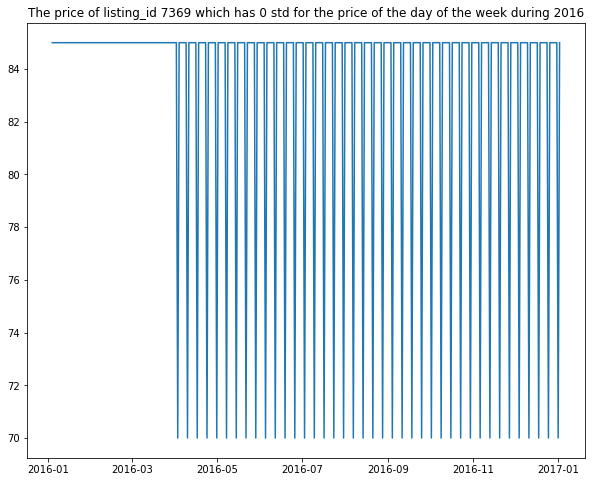

In [38]:
plt.figure(figsize = (10,8))
plt.plot(calendar.query('listing_id == 7369')['date'], calendar.query('listing_id == 7369')['price'])
plt.title('The price of listing_id 7369 which has 0 std for the price of the day of the week during 2016');

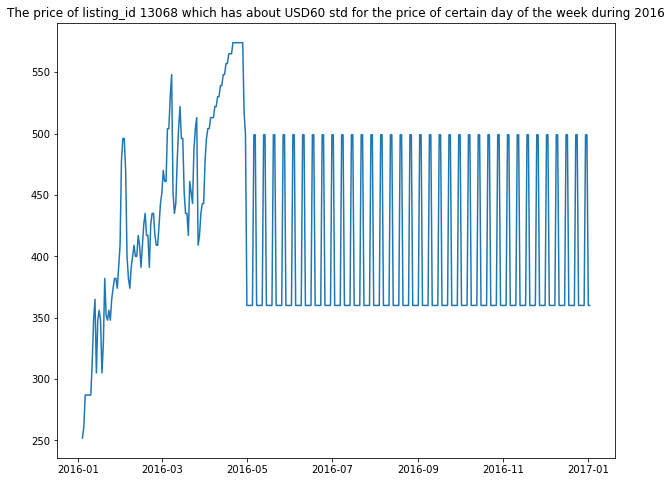

In [39]:
plt.figure(figsize = (10,8))
plt.plot(calendar.query('listing_id == 13068')['date'], calendar.query('listing_id == 13068')['price'])
plt.title('The price of listing_id 13068 which has about USD60 std for the price of certain day of the week during 2016');



#### Most of std is 0 means the price are the same if it's the same date in week. Therefore we can fill in the missing value of price by the weekday value. I have fill the missing price in [Data Clean] section.

> I want to check if the availability has a trend in 2016 and find out the busiest period and see if the availability is related to the price

In [40]:
date_available_counts = calendar.groupby(['date', 'available']).size().reset_index(name = 'counts')
date_available_counts['percentage'] =  date_available_counts['counts']/3818
date_available_counts

,date,available,counts,percentage
0,2016-01-04,f,2083,0.545574
1,2016-01-04,t,1735,0.454426
2,2016-01-05,f,1951,0.511001
3,2016-01-05,t,1867,0.488999
4,2016-01-06,f,1992,0.521739
...,...,...,...,...
725,2016-12-31,t,2859,0.748821
726,2017-01-01,f,896,0.234678
727,2017-01-01,t,2922,0.765322
728,2017-01-02,f,1042,0.272918


In [41]:
available_rate = date_available_counts.query('available == "t"')[['date','percentage']]

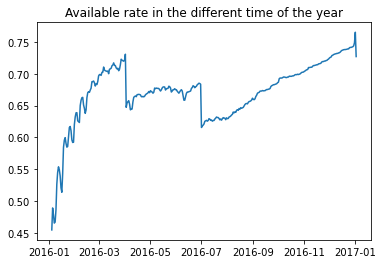

In [42]:
plt.plot(available_rate['date'], available_rate['percentage'])
plt.title('Available rate in the different time of the year');

> From the above figure, we can see the availability drop obviously in the end of March, June and also in the begining of 2017. In my opinion, drop in the end of June and the begining of 2017 might be because of the summer vacation coming and New Year holidy. In addition, when it comes to the end of March, the weather gets warmer and people start weekend getaways. I will use the below cell to get the exact date that the availability going down.

In [43]:
for i in range(len(available_rate)-1):
    if available_rate.iloc[i,1] - available_rate.iloc[i+1,1] > 0.02:
        print(available_rate.iloc[i,0])

2016-04-01 00:00:00
2016-06-30 00:00:00
2017-01-01 00:00:00


> The availability will change by the day of the week so I want to calculate the mean price of each week and find out the busiest week.

In [44]:
date_available_counts['weekday'] = date_available_counts['date'].dt.weekday
date_available_counts['week_order'] = date_available_counts['date'].dt.week
date_available_counts

,date,available,counts,percentage,weekday,week_order
0,2016-01-04,f,2083,0.545574,0,1
1,2016-01-04,t,1735,0.454426,0,1
2,2016-01-05,f,1951,0.511001,1,1
3,2016-01-05,t,1867,0.488999,1,1
4,2016-01-06,f,1992,0.521739,2,1
...,...,...,...,...,...,...
725,2016-12-31,t,2859,0.748821,5,52
726,2017-01-01,f,896,0.234678,6,52
727,2017-01-01,t,2922,0.765322,6,52
728,2017-01-02,f,1042,0.272918,0,1


In [45]:
week_order = date_available_counts.query('available == "t"').groupby('week_order')['percentage'].mean().reset_index(name = 'rate')
busy_week = []
for i in range(len(week_order)-1):
    if week_order.iloc[i,1] - week_order.iloc[i+1,1] > 0.02:
        busy_week.append(i)
for i in range(len(date_available_counts.query('available == "t"'))):
    if date_available_counts.query('available == "t"')['week_order'].iloc[i] in busy_week:
        print(date_available_counts.query('available == "t"')['date'].iloc[i])

2016-03-21 00:00:00
2016-03-22 00:00:00
2016-03-23 00:00:00
2016-03-24 00:00:00
2016-03-25 00:00:00
2016-03-26 00:00:00
2016-03-27 00:00:00
2016-06-13 00:00:00
2016-06-14 00:00:00
2016-06-15 00:00:00
2016-06-16 00:00:00
2016-06-17 00:00:00
2016-06-18 00:00:00
2016-06-19 00:00:00
2016-06-20 00:00:00
2016-06-21 00:00:00
2016-06-22 00:00:00
2016-06-23 00:00:00
2016-06-24 00:00:00
2016-06-25 00:00:00
2016-06-26 00:00:00


> busiest period
- 2016/3/21-2016/3/27
- 2016/6/13-2016/6/26
- 2017/01/02

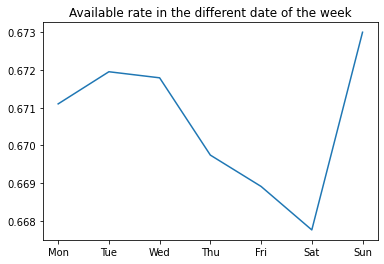

In [46]:
weekday_available_rate = date_available_counts.query('available == "t"').groupby('weekday')['percentage'].mean().reset_index(name = 'available_rate')
plt.plot(x, weekday_available_rate['available_rate'])
plt.title('Available rate in the different date of the week');

> Besides the price, the day of the week also affects the availability. Thursday, Friday and Saturday have lower available rate which make sense as people will use long weekend to travel. Thur-Saturday is a more popular choice than Friday-Sunday.

### When is the busiest period of the year? How is the price fluctuate within the year?

In [47]:
date_price = calendar.groupby('date')['price'].mean().reset_index(name = 'average_price')

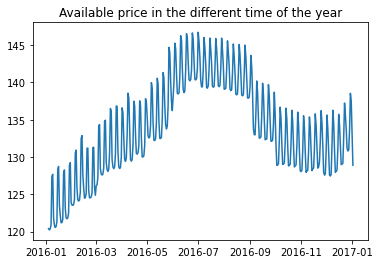

In [48]:
plt.plot(date_price['date'], date_price['average_price'])
plt.title('Available price in the different time of the year');

> The daily price fluctuate too much so I have to use moving average price MA7 to smooth the line. We can remove the effect of day of week pricing strategy by MA7 to the smooth price trend within the year.

In [49]:
MA7 = []
for i in range(len(date_price)-7):
    MA7.append(date_price['average_price'][i:i+7].mean())


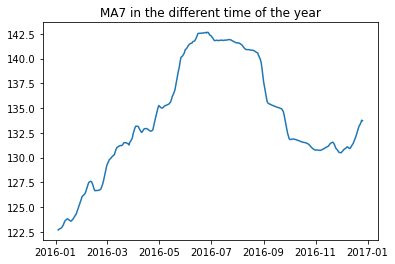

In [50]:
plt.plot(date_price['date'][:-7], MA7)
plt.title('MA7 in the different time of the year');

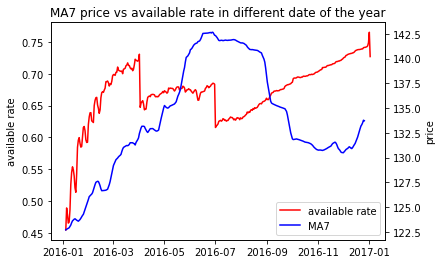

In [51]:
fig,ax1 = plt.subplots(1) 

ax2 = ax1.twinx() 

ax1.plot(available_rate['date'], available_rate['percentage'],'r-', label = 'available rate') 
ax2.plot(date_price['date'][:-7], MA7,'b-', label = 'MA7') 
plt.title('MA7 price vs available rate in different date of the year')
ax1.set_ylabel('available rate')
ax2.set_ylabel('price')
line1, label1 = ax1.get_legend_handles_labels()
line2, label2 = ax2.get_legend_handles_labels()
ax1.legend(line1+line2, label1+label2, loc = 'best');


> Price are highest during summer. However, price and avaliability doesn't show correlated trends

> In my opinion, zipcode might affect price. Therefore I group the listing_id by their zipcode, and want to see if the price and availability for the listings with same zipcode are correlated.

In [52]:
zipcode_mean_price = listings.groupby('zipcode')['price'].mean().reset_index(name = 'price')

In [53]:
yearly_available_rate = calendar.groupby(['listing_id', 'available']).size().reset_index(name = 'counts')
yearly_available_rate = yearly_available_rate.query('available == "t"')
yearly_available_rate['available rate'] = yearly_available_rate['counts']/365
yearly_available_rate = yearly_available_rate.merge(listings[['id','zipcode']], left_on = 'listing_id', right_on = 'id', how = 'left')
yearly_available_rate.drop('id', axis = 1, inplace = True)
yearly_available_rate


,listing_id,available,counts,available rate,zipcode
0,3335,t,309,0.846575,98118
1,4291,t,365,1.000000,98115
2,5682,t,309,0.846575,98106
3,6606,t,365,1.000000,98103
4,7369,t,53,0.145205,98122
...,...,...,...,...,...
3718,10331249,t,354,0.969863,98116
3719,10332096,t,365,1.000000,98125
3720,10334184,t,361,0.989041,98102
3721,10339145,t,365,1.000000,98116


### Does zipcode affect the price of house and availability?

In [54]:
zipcode_mean_price['available_rate'] = yearly_available_rate.groupby('zipcode')['available rate'].mean().values

> I want to see if the availability and price which is grouped by their zipcode are correlated.

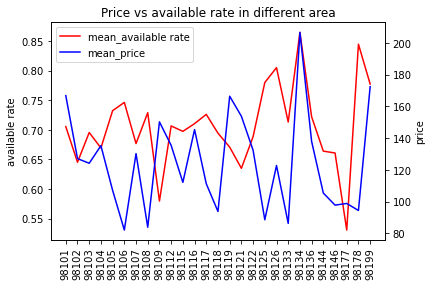

In [55]:
fig,ax1 = plt.subplots(1) 

ax2 = ax1.twinx() 

ax1.plot(zipcode_mean_price['zipcode'], zipcode_mean_price['available_rate'],'r-', label = 'mean_available rate') 
ax2.plot(zipcode_mean_price['zipcode'], zipcode_mean_price['price'],'b-', label = 'mean_price') 
plt.title('Price vs available rate in different area')
ax1.set_ylabel('available rate')
ax2.set_ylabel('price')
line1, label1 = ax1.get_legend_handles_labels()
line2, label2 = ax2.get_legend_handles_labels()
ax1.set_xticklabels(zipcode_mean_price['zipcode'],rotation = 90)
ax1.legend(line1+line2, label1+label2, loc = 'best');



In [56]:
zipcode_mean_price.corr()

,price,available_rate
price,1.000000,0.093404
available_rate,0.093404,1.000000


> To conclude that price and availability of different zipcode are not correlate. 

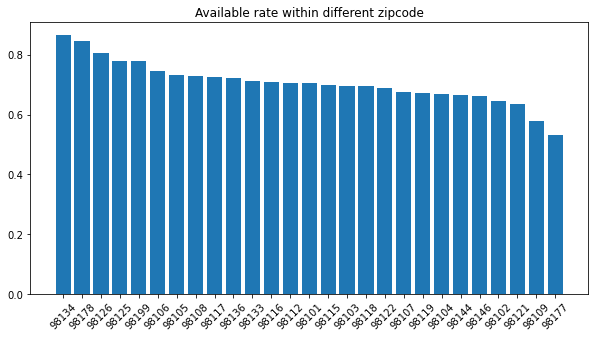

In [57]:
plt.figure(figsize = (10,5))
zipcode_mean_price = zipcode_mean_price.sort_values('available_rate',ascending = False)
plt.bar(zipcode_mean_price['zipcode'], zipcode_mean_price['available_rate'])
plt.xticks(rotation = 45)
plt.title('Available rate within different zipcode');

> We can see from the figure above, some zipcode have higher availability than other zipcode. Also, from the below figure, some zipcode have higher price than other zipcode. However, these two factors are not correlated.

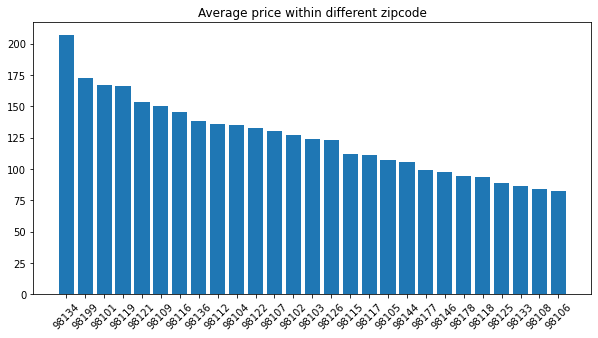

In [58]:
plt.figure(figsize = (10,5))
zipcode_mean_price = zipcode_mean_price.sort_values('price', ascending = False)
plt.bar(zipcode_mean_price['zipcode'], zipcode_mean_price['price'])
plt.xticks(rotation = 45)
plt.title('Average price within different zipcode');

In [59]:
yearly_available_rate['mean_price'] = calendar.groupby('listing_id')['price'].mean().reset_index(name = 'price')['price']

In [60]:
correlated = []
for i in yearly_available_rate['zipcode'].unique():
    cor = yearly_available_rate.query('zipcode == @i')[['available rate','mean_price']].corr().iloc[0,1]
    print('correlation of zipcode {} : '.format(str(i))+ str(cor))
    if abs(cor) > 0.2:
        correlated.append((i, cor))
correlated

correlation of zipcode 98118 : -0.031095545144996888
correlation of zipcode 98115 : 0.13367083564194795
correlation of zipcode 98106 : 0.031455923479137074
correlation of zipcode 98103 : -0.026836757059802038
correlation of zipcode 98122 : 0.01735926063362065
correlation of zipcode 98108 : 0.18751146686859832
correlation of zipcode 98101 : 0.021451687624718684
correlation of zipcode 98136 : 0.08517206939986238
correlation of zipcode 98102 : -0.020929104017782838
correlation of zipcode 98121 : 0.03962950036388156
correlation of zipcode 98107 : -0.0723325733090359
correlation of zipcode 98105 : 0.06951791593999712
correlation of zipcode 98117 : 0.10441364472062944
correlation of zipcode 98126 : 0.05631820067359198
correlation of zipcode 98112 : -0.020742618691176853
correlation of zipcode 98109 : 0.005748591472192493
correlation of zipcode 98116 : -0.06614996670904152
correlation of zipcode 98144 : 0.040140498257729314
correlation of zipcode 98104 : 0.030405852955735727
correlation of zi

[('98146', -0.3327609795070278),
 ('98134', 0.3404367611015732),
 ('98178', 0.5908571894257031)]

For zipcode in ['98146', '98134', '98178'], price and available rate are correlated
- 98146 negatively correlated
- 98134 98178 positively correlated

### Which factors in the listing will affect the price?

> I will use the below cells to find out the factors correlated to the price of listings

In [61]:
listings = listings.merge(yearly_available_rate[['listing_id','available rate']], left_on = 'id', right_on = 'listing_id', how = 'left')
listings.drop('listing_id', axis = 1, inplace = True)

In [62]:
# find the correlation between price and other factors
listings.corr().loc['price']

accommodates                      0.652218
availability_30                  -0.037653
availability_365                 -0.015550
availability_60                  -0.049336
availability_90                  -0.058810
bathrooms                         0.516424
bedrooms                          0.627720
beds                              0.589525
calculated_host_listings_count   -0.054092
guests_included                   0.392875
host_id                          -0.051332
host_listings_count               0.093962
host_total_listings_count         0.093962
id                               -0.046289
latitude                         -0.008904
longitude                        -0.102420
maximum_nights                   -0.003336
minimum_nights                    0.017297
number_of_reviews                -0.124695
price                             1.000000
review_scores_accuracy            0.019026
review_scores_checkin             0.007877
review_scores_cleanliness         0.054357
review_scor

In [63]:
related_factors = list(listings.corr().loc['price'][(abs(listings.corr().loc['price']) > 0.2)==True].index)
related_factors

['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'guests_included',
 'price',
 'reviews_per_month',
 'square_feet']

In [64]:
listings.corr().loc['price'][related_factors].sort_values().drop('price')

reviews_per_month   -0.218588
guests_included      0.392875
bathrooms            0.516424
square_feet          0.531752
beds                 0.589525
bedrooms             0.627720
accommodates         0.652218
Name: price, dtype: float64

>The higher the reviews_per_month, the lower the price, which makes sense as it means the room is more affordable. Other factors are also reasonable: larger rooms, more beds, rooms, bathrooms, and guests included.

### Which factors in the listing will affect the availability?

> I will use the below cells to find out the factors correlated to the availability of listings

In [65]:
# find the correlation between available rate and other factors
related_factors_available = list(listings.corr().loc['available rate'][(abs(listings.corr().loc['available rate']) > 0.2)==True].index)
related_factors_available

['availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'available rate']

In [66]:
listings.corr().loc['available rate'][related_factors_available].sort_values().drop('available rate')

availability_30     0.469816
availability_60     0.537860
availability_90     0.584888
availability_365    1.000000
Name: available rate, dtype: float64

>There are four features correlated to the mean availability of each listing. They are the availabilities of different durations. This makes sense but I planned to find out other factors that will affect the availability. Even though I failed to find out meaningful factors that affect the availability of the listing, in the previous questions, there are some factors affecting price in the subgroup of listings, such as different zipcodes group.

# Link to blog post

https://medium.com/@eileenchang1991/udacity-seattle-airbnb-project1-e2e02fe49213

# Link to Github

https://github.com/PeiningHsu/Udacity_Data_Scientist